In [11]:
!pip install matplotlib seaborn
#  Imports necessários. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
# Lendo a base de dados utilizada.

obesityDataSet = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv', sep=',')
display(obesityDataSet)

obesityDataSet.shape

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


(2111, 17)

In [13]:
# Checando tipos das colunas presentes.

obesityDataSet.dtypes

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [14]:
# Buscando por valores nulos.
obesityDataSet.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [15]:
obesityDataSet.nunique()


Age                               1402
Gender                               2
Height                            1574
Weight                            1525
CALC                                 4
FAVC                                 2
FCVC                               810
NCP                                635
SCC                                  2
SMOKE                                2
CH2O                              1268
family_history_with_overweight       2
FAF                               1190
TUE                               1129
CAEC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [16]:
# Verificando se ha alguma categoria ´NObeyesdad´ diferente das categorias padrão.
subset = obesityDataSet.loc[~obesityDataSet['NObeyesdad'].isin(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Overweight_Level_III', 'Obesity_Type_III', 'Obesity_Type_II', 'Obesity_Type_I'])]

display(subset)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
59,20.000000,Male,1.760000,55.000000,no,yes,2.000000,4.000000,no,no,3.000000,yes,2.000000,2.000000,Sometimes,Public_Transportation,Insufficient_Weight
71,22.000000,Female,1.670000,50.000000,Sometimes,no,3.000000,3.000000,yes,no,3.000000,yes,2.000000,1.000000,no,Public_Transportation,Insufficient_Weight
75,23.000000,Female,1.630000,45.000000,no,no,3.000000,3.000000,yes,no,3.000000,yes,2.000000,0.000000,Sometimes,Public_Transportation,Insufficient_Weight
76,24.000000,Female,1.600000,45.000000,no,no,2.000000,3.000000,no,no,2.000000,yes,1.000000,0.000000,no,Public_Transportation,Insufficient_Weight
83,19.000000,Female,1.600000,45.000000,no,no,3.000000,3.000000,yes,no,3.000000,no,2.000000,0.000000,no,Walking,Insufficient_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,19.000000,Female,1.531610,42.000000,Sometimes,yes,2.749268,1.394539,no,no,1.322048,no,0.463949,0.800993,Frequently,Public_Transportation,Insufficient_Weight
741,19.434709,Female,1.525691,42.000000,Sometimes,yes,3.000000,1.000000,no,no,1.764055,no,0.000000,0.560887,Frequently,Public_Transportation,Insufficient_Weight
742,18.000000,Male,1.719827,52.289828,Sometimes,yes,1.202075,3.000000,no,no,1.927976,yes,0.023574,1.747256,Sometimes,Public_Transportation,Insufficient_Weight
743,18.381382,Male,1.722547,53.783977,Sometimes,yes,2.000000,3.131032,no,no,2.072194,yes,1.487987,2.000000,Sometimes,Public_Transportation,Insufficient_Weight


In [17]:
# Abstraindo as linhas: Deixa-mos somente as linhas que nos interessam.
obesityTypeDataSet = obesityDataSet.loc[(obesityDataSet['NObeyesdad'] != 'Normal_Weight') & (obesityDataSet['NObeyesdad'] != 'Overweight_Level_I') & (obesityDataSet['NObeyesdad'] != 'Overweight_Level_II') & (obesityDataSet['NObeyesdad'] != 'Overweight_Level_III') & (obesityDataSet['NObeyesdad'] != 'Insufficient_Weight')]
display(obesityTypeDataSet)



,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
10,26.000000,Male,1.850000,105.000000,Sometimes,yes,3.0,3.0,no,no,3.000000,yes,2.000000,2.000000,Frequently,Public_Transportation,Obesity_Type_I
13,41.000000,Male,1.800000,99.000000,Frequently,yes,2.0,3.0,no,no,2.000000,no,2.000000,1.000000,Sometimes,Automobile,Obesity_Type_I
17,29.000000,Female,1.530000,78.000000,no,yes,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I
21,52.000000,Female,1.690000,87.000000,no,yes,3.0,1.0,no,yes,2.000000,yes,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I
23,22.000000,Female,1.600000,82.000000,Sometimes,yes,1.0,1.0,no,no,2.000000,yes,0.000000,2.000000,Sometimes,Public_Transportation,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [18]:
# Criando coluna ´imc´: Indice de massa corpórea.
obesityTypeDataSet.loc[:,'imc'] = (obesityTypeDataSet['Weight']) / (obesityTypeDataSet['Height'] ** 2)

display(obesityTypeDataSet)

C:\Users\Dayvson\AppData\Local\Temp\ipykernel_2348\567057699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obesityTypeDataSet.loc[:,'imc'] = (obesityTypeDataSet['Weight']) / (obesityTypeDataSet['Height'] ** 2)


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,imc
10,26.000000,Male,1.850000,105.000000,Sometimes,yes,3.0,3.0,no,no,3.000000,yes,2.000000,2.000000,Frequently,Public_Transportation,Obesity_Type_I,30.679328
13,41.000000,Male,1.800000,99.000000,Frequently,yes,2.0,3.0,no,no,2.000000,no,2.000000,1.000000,Sometimes,Automobile,Obesity_Type_I,30.555556
17,29.000000,Female,1.530000,78.000000,no,yes,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I,33.320518
21,52.000000,Female,1.690000,87.000000,no,yes,3.0,1.0,no,yes,2.000000,yes,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I,30.461118
23,22.000000,Female,1.600000,82.000000,Sometimes,yes,1.0,1.0,no,no,2.000000,yes,0.000000,2.000000,Sometimes,Public_Transportation,Obesity_Type_I,32.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535


In [19]:
# Mudando o tipo das idades de Float para int.
obesityTypeDataSet.loc[:, 'Age'] = obesityTypeDataSet['Age'].astype(int)
display(obesityTypeDataSet)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,imc
10,26.0,Male,1.850000,105.000000,Sometimes,yes,3.0,3.0,no,no,3.000000,yes,2.000000,2.000000,Frequently,Public_Transportation,Obesity_Type_I,30.679328
13,41.0,Male,1.800000,99.000000,Frequently,yes,2.0,3.0,no,no,2.000000,no,2.000000,1.000000,Sometimes,Automobile,Obesity_Type_I,30.555556
17,29.0,Female,1.530000,78.000000,no,yes,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I,33.320518
21,52.0,Female,1.690000,87.000000,no,yes,3.0,1.0,no,yes,2.000000,yes,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I,30.461118
23,22.0,Female,1.600000,82.000000,Sometimes,yes,1.0,1.0,no,no,2.000000,yes,0.000000,2.000000,Sometimes,Public_Transportation,Obesity_Type_I,32.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.0,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475
2107,21.0,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923
2108,22.0,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817
2109,24.0,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535


In [20]:
# Separando dataSet por Categoria ´NObeyesdad´.
obesityLevel_I = obesityTypeDataSet.loc[obesityTypeDataSet['NObeyesdad'] == 'Obesity_Type_I']
display(obesityLevel_I)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,imc
10,26.0,Male,1.850000,105.000000,Sometimes,yes,3.000000,3.000000,no,no,3.000000,yes,2.000000,2.000000,Frequently,Public_Transportation,Obesity_Type_I,30.679328
13,41.0,Male,1.800000,99.000000,Frequently,yes,2.000000,3.000000,no,no,2.000000,no,2.000000,1.000000,Sometimes,Automobile,Obesity_Type_I,30.555556
17,29.0,Female,1.530000,78.000000,no,yes,2.000000,1.000000,no,no,2.000000,no,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I,33.320518
21,52.0,Female,1.690000,87.000000,no,yes,3.000000,1.000000,no,yes,2.000000,yes,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I,30.461118
23,22.0,Female,1.600000,82.000000,Sometimes,yes,1.000000,1.000000,no,no,2.000000,yes,0.000000,2.000000,Sometimes,Public_Transportation,Obesity_Type_I,32.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,20.0,Male,1.705304,99.873716,no,yes,2.000000,1.293342,no,no,2.000000,yes,0.000000,1.917679,Sometimes,Public_Transportation,Obesity_Type_I,34.343740
1509,19.0,Female,1.612910,82.193405,no,yes,1.261288,2.930044,no,no,1.166655,yes,0.133398,0.951740,Sometimes,Public_Transportation,Obesity_Type_I,31.594879
1510,18.0,Female,1.605469,82.039000,no,yes,2.765330,3.000000,no,no,1.048584,yes,0.192559,0.720411,Sometimes,Public_Transportation,Obesity_Type_I,31.828525
1511,18.0,Male,1.804160,104.406820,no,yes,2.000000,3.000000,no,no,3.000000,yes,2.240500,0.000000,Sometimes,Public_Transportation,Obesity_Type_I,32.075894


In [21]:
# Tirando a media de idade por sexo.

mean_age_male_Obesity_I = obesityLevel_I.loc[obesityLevel_I['Gender'] == 'Male', 'Age'].mean().astype(int)


mean_age_female_Obesity_I = obesityLevel_I.loc[obesityLevel_I['Gender'] == 'Female', 'Age'].mean().astype(int)

print("Média de idade entre homens:", mean_age_male_Obesity_I)
print("Média de idade entre mulheres:", mean_age_female_Obesity_I)

Média de idade entre homens: 23
Média de idade entre mulheres: 27


In [22]:
# Separando dataSet por Categoria ´NObeyesdad´.
obesityLevel_II = obesityTypeDataSet.loc[obesityTypeDataSet['NObeyesdad'] == 'Obesity_Type_II']
display(obesityLevel_II)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,imc
68,30.0,Male,1.760000,112.000000,Frequently,yes,1.000000,3.000000,yes,yes,2.000000,yes,0.000000,0.000000,no,Automobile,Obesity_Type_II,36.157025
90,25.0,Female,1.630000,93.000000,no,no,3.000000,4.000000,no,no,1.000000,no,2.000000,0.000000,Always,Public_Transportation,Obesity_Type_II,35.003199
165,30.0,Male,1.920000,130.000000,Sometimes,no,2.000000,3.000000,no,yes,1.000000,yes,1.000000,0.000000,Sometimes,Public_Transportation,Obesity_Type_II,35.264757
197,41.0,Male,1.750000,118.000000,Sometimes,yes,2.000000,3.000000,no,no,2.000000,yes,0.000000,0.000000,Sometimes,Bike,Obesity_Type_II,38.530612
210,20.0,Male,1.800000,114.000000,no,yes,2.000000,3.000000,no,no,2.000000,yes,0.000000,1.000000,Frequently,Public_Transportation,Obesity_Type_II,35.185185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,30.0,Male,1.653876,102.583895,no,yes,2.919526,2.142328,no,no,1.175714,yes,0.958555,0.636289,Sometimes,Public_Transportation,Obesity_Type_II,37.503629
1795,20.0,Male,1.657132,105.580491,no,yes,2.724121,1.437959,no,no,1.590418,yes,0.029603,1.122118,Sometimes,Public_Transportation,Obesity_Type_II,38.447621
1796,20.0,Male,1.644751,101.067988,no,yes,2.801992,1.343117,no,no,1.128942,yes,0.233987,0.819980,Sometimes,Public_Transportation,Obesity_Type_II,37.360554
1797,25.0,Male,1.660761,104.321463,no,yes,2.748971,1.213431,no,no,1.448875,yes,0.128548,1.239038,Sometimes,Public_Transportation,Obesity_Type_II,37.823298


In [23]:
# Tirando a media de idade por sexo.

mean_age_male_Obesity_II = obesityLevel_II.loc[obesityLevel_II['Gender'] == 'Male', 'Age'].mean().astype(int)


mean_age_female_Obesity_II = obesityLevel_II.loc[obesityLevel_II['Gender'] == 'Female', 'Age'].mean().astype(int)

print("Média de idade entre homens:", mean_age_male_Obesity_II)
print("Média de idade entre mulheres:", mean_age_female_Obesity_II)

Média de idade entre homens: 27
Média de idade entre mulheres: 24


In [24]:
# Separando dataSet por Categoria ´NObeyesdad´.
obesityLevel_III = obesityTypeDataSet.loc[obesityTypeDataSet['NObeyesdad'] == 'Obesity_Type_III']
display(obesityLevel_III)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,imc
202,26.0,Female,1.560000,102.000000,Sometimes,yes,3.0,3.0,no,yes,1.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Obesity_Type_III,41.913215
344,18.0,Male,1.870000,173.000000,Sometimes,yes,3.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Frequently,Public_Transportation,Obesity_Type_III,49.472390
403,26.0,Female,1.660000,112.000000,no,no,3.0,3.0,no,no,3.000000,yes,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_III,40.644506
498,25.0,Female,1.686306,104.572712,Sometimes,yes,3.0,3.0,no,no,1.152736,yes,0.319156,1.000000,Sometimes,Public_Transportation,Obesity_Type_III,36.774400
499,18.0,Female,1.683124,126.673780,Sometimes,yes,3.0,3.0,no,no,1.115967,yes,1.541072,1.000000,Sometimes,Public_Transportation,Obesity_Type_III,44.715131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.0,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475
2107,21.0,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923
2108,22.0,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817
2109,24.0,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535


In [25]:
# Tirando a media de idade por sexo.

mean_age_male_Obesity_III = obesityLevel_III.loc[obesityLevel_III['Gender'] == 'Male', 'Age'].mean().astype(int)


mean_age_female_Obesity_III = obesityLevel_III.loc[obesityLevel_III['Gender'] == 'Female', 'Age'].mean().astype(int)

print("Média de idade entre homens:", mean_age_male_Obesity_III)
print("Média de idade entre mulheres:", mean_age_female_Obesity_III)

Média de idade entre homens: 18
Média de idade entre mulheres: 23


In [26]:
# Calculando a média e a mediana da idade por sexo.

mean_obesityData_Man = obesityTypeDataSet.loc[obesityTypeDataSet['Gender'] == 'Male', 'Age'].mean()

mean_obesityData_Woman = obesityTypeDataSet.loc[obesityTypeDataSet['Gender'] == 'Female', 'Age'].mean()


print("Man mean",mean_obesityData_Man)

print("Woman mean",mean_obesityData_Woman)


median_man = np.median(obesityTypeDataSet.loc[obesityTypeDataSet['Gender'] == 'Male', 'Age'])
median_woman = np.median(obesityTypeDataSet.loc[obesityTypeDataSet['Gender'] == 'Female', 'Age'])


print("Man median",mean_obesityData_Man)

print("Woman median",median_woman)

# Ambos os casos mostram que a média é maior do que a mediana. Isso sugere que pode haver alguns valores extremos de idade
# mais altos que estão puxando a média para cima em ambos os grupos (homens e mulheres). Esses valores extremos podem 
# representar uma pequena porcentagem da população, enquanto a maioria das idades está abaixo da média.

Man mean 26.209775967413442
Woman mean 24.51975051975052
Man median 26.209775967413442
Woman median 24.0


In [27]:
# Criando dataSete para determinada analise.
consumo_de_Alimentos_e_habitos = obesityTypeDataSet[['Age', 'Gender', 'FAVC', 'FCVC', 'NCP', 'family_history_with_overweight', 'imc', 'NObeyesdad']]

display(consumo_de_Alimentos_e_habitos)

consumo_de_Alimentos_e_habitos.shape

,Age,Gender,FAVC,FCVC,NCP,family_history_with_overweight,imc,NObeyesdad
10,26.0,Male,yes,3.0,3.0,yes,30.679328,Obesity_Type_I
13,41.0,Male,yes,2.0,3.0,no,30.555556,Obesity_Type_I
17,29.0,Female,yes,2.0,1.0,no,33.320518,Obesity_Type_I
21,52.0,Female,yes,3.0,1.0,yes,30.461118,Obesity_Type_I
23,22.0,Female,yes,1.0,1.0,yes,32.031250,Obesity_Type_I
...,...,...,...,...,...,...,...,...
2106,20.0,Female,yes,3.0,3.0,yes,44.901475,Obesity_Type_III
2107,21.0,Female,yes,3.0,3.0,yes,43.741923,Obesity_Type_III
2108,22.0,Female,yes,3.0,3.0,yes,43.543817,Obesity_Type_III
2109,24.0,Female,yes,3.0,3.0,yes,44.071535,Obesity_Type_III


(972, 8)

In [28]:
# Verificando quantidades de linhas de acordo com o critério.
display(consumo_de_Alimentos_e_habitos.loc[consumo_de_Alimentos_e_habitos['FAVC'] == 'yes'])


,Age,Gender,FAVC,FCVC,NCP,family_history_with_overweight,imc,NObeyesdad
10,26.0,Male,yes,3.0,3.0,yes,30.679328,Obesity_Type_I
13,41.0,Male,yes,2.0,3.0,no,30.555556,Obesity_Type_I
17,29.0,Female,yes,2.0,1.0,no,33.320518,Obesity_Type_I
21,52.0,Female,yes,3.0,1.0,yes,30.461118,Obesity_Type_I
23,22.0,Female,yes,1.0,1.0,yes,32.031250,Obesity_Type_I
...,...,...,...,...,...,...,...,...
2106,20.0,Female,yes,3.0,3.0,yes,44.901475,Obesity_Type_III
2107,21.0,Female,yes,3.0,3.0,yes,43.741923,Obesity_Type_III
2108,22.0,Female,yes,3.0,3.0,yes,43.543817,Obesity_Type_III
2109,24.0,Female,yes,3.0,3.0,yes,44.071535,Obesity_Type_III


In [29]:
# Verificando quantidades de linhas de acordo com o critério.

display(consumo_de_Alimentos_e_habitos.loc[(consumo_de_Alimentos_e_habitos['FAVC'] == 'yes') & (consumo_de_Alimentos_e_habitos['family_history_with_overweight'] == 'yes')])


,Age,Gender,FAVC,FCVC,NCP,family_history_with_overweight,imc,NObeyesdad
10,26.0,Male,yes,3.0,3.0,yes,30.679328,Obesity_Type_I
21,52.0,Female,yes,3.0,1.0,yes,30.461118,Obesity_Type_I
23,22.0,Female,yes,1.0,1.0,yes,32.031250,Obesity_Type_I
67,23.0,Male,yes,2.0,3.0,yes,34.894399,Obesity_Type_I
68,30.0,Male,yes,1.0,3.0,yes,36.157025,Obesity_Type_II
...,...,...,...,...,...,...,...,...
2106,20.0,Female,yes,3.0,3.0,yes,44.901475,Obesity_Type_III
2107,21.0,Female,yes,3.0,3.0,yes,43.741923,Obesity_Type_III
2108,22.0,Female,yes,3.0,3.0,yes,43.543817,Obesity_Type_III
2109,24.0,Female,yes,3.0,3.0,yes,44.071535,Obesity_Type_III


In [30]:
display(consumo_de_Alimentos_e_habitos.loc[(consumo_de_Alimentos_e_habitos['FAVC'] == 'yes') & (consumo_de_Alimentos_e_habitos['family_history_with_overweight'] == 'yes')])


,Age,Gender,FAVC,FCVC,NCP,family_history_with_overweight,imc,NObeyesdad
10,26.0,Male,yes,3.0,3.0,yes,30.679328,Obesity_Type_I
21,52.0,Female,yes,3.0,1.0,yes,30.461118,Obesity_Type_I
23,22.0,Female,yes,1.0,1.0,yes,32.031250,Obesity_Type_I
67,23.0,Male,yes,2.0,3.0,yes,34.894399,Obesity_Type_I
68,30.0,Male,yes,1.0,3.0,yes,36.157025,Obesity_Type_II
...,...,...,...,...,...,...,...,...
2106,20.0,Female,yes,3.0,3.0,yes,44.901475,Obesity_Type_III
2107,21.0,Female,yes,3.0,3.0,yes,43.741923,Obesity_Type_III
2108,22.0,Female,yes,3.0,3.0,yes,43.543817,Obesity_Type_III
2109,24.0,Female,yes,3.0,3.0,yes,44.071535,Obesity_Type_III


In [33]:
display(obesityTypeDataSet)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,imc
10,26.0,Male,1.850000,105.000000,Sometimes,yes,3.0,3.0,no,no,3.000000,yes,2.000000,2.000000,Frequently,Public_Transportation,Obesity_Type_I,30.679328
13,41.0,Male,1.800000,99.000000,Frequently,yes,2.0,3.0,no,no,2.000000,no,2.000000,1.000000,Sometimes,Automobile,Obesity_Type_I,30.555556
17,29.0,Female,1.530000,78.000000,no,yes,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I,33.320518
21,52.0,Female,1.690000,87.000000,no,yes,3.0,1.0,no,yes,2.000000,yes,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I,30.461118
23,22.0,Female,1.600000,82.000000,Sometimes,yes,1.0,1.0,no,no,2.000000,yes,0.000000,2.000000,Sometimes,Public_Transportation,Obesity_Type_I,32.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.0,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475
2107,21.0,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923
2108,22.0,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817
2109,24.0,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535


In [34]:
obesityTypeDataSet.dtypes

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
imc                               float64
dtype: object

In [35]:
from sklearn.preprocessing import LabelEncoder

# Inicializando o LabelEncoder
label_encoder = LabelEncoder()

df_encoded = obesityTypeDataSet.copy()

# Colunas a serem transformadas
columns_to_encode = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']

# Aplicando LabelEncoder às colunas categóricas
for column in columns_to_encode:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
    
# #Retirando as colunas Nome e Ticket
# df_encoded = df_encoded.drop(['Name','Ticket'], axis=1)

# Mostrando o DataFrame transformado
df_encoded.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,imc
10,26.0,1,1.85,105.0,1,1,3.0,3.0,0,0,3.0,1,2.0,2.0,1,3,0,30.679328
13,41.0,1,1.80,99.0,0,1,2.0,3.0,0,0,2.0,0,2.0,1.0,2,0,0,30.555556
17,29.0,0,1.53,78.0,2,1,2.0,1.0,0,0,2.0,0,0.0,0.0,2,0,0,33.320518
21,52.0,0,1.69,87.0,2,1,3.0,1.0,0,1,2.0,1,0.0,0.0,2,0,0,30.461118
23,22.0,0,1.60,82.0,1,1,1.0,1.0,0,0,2.0,1,0.0,2.0,2,3,0,32.031250


In [37]:
df_encoded.corr()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,imc
Age,1.000000,0.143427,-0.197200,-0.291329,-0.136325,-0.061690,-0.130143,-0.068696,-0.028713,0.119508,-0.154037,0.013506,-0.108127,-0.356929,0.021311,-0.725639,-0.167303,-0.225880
Gender,0.143427,1.000000,0.608395,0.050469,0.136799,-0.080298,-0.439139,-0.012397,0.017976,0.095279,-0.028438,-0.044614,0.256108,0.075418,-0.038706,-0.232382,-0.445607,-0.414173
Height,-0.197200,0.608395,1.000000,0.639845,-0.223889,-0.043645,-0.107615,0.233356,0.013207,0.133984,0.242227,0.000566,0.401622,0.138859,-0.021149,0.072739,-0.019941,0.016166
Weight,-0.291329,0.050469,0.639845,1.000000,-0.405150,0.043380,0.394908,0.401047,-0.018441,0.047568,0.208063,0.073627,0.217553,0.094388,0.039986,0.232803,0.678827,0.775377
CALC,-0.136325,0.136799,-0.223889,-0.405150,1.000000,-0.043608,-0.187611,-0.291303,0.012910,-0.090903,-0.158634,0.020418,0.100210,0.117726,0.010924,0.164877,-0.389090,-0.349455
FAVC,-0.061690,-0.080298,-0.043645,0.043380,-0.043608,1.000000,0.039686,-0.028603,-0.126117,-0.128409,-0.086017,0.151646,-0.049822,0.006310,0.056463,0.089969,0.084518,0.091194
FCVC,-0.130143,-0.439139,-0.107615,0.394908,-0.187611,0.039686,1.000000,0.107565,-0.092700,-0.036441,0.046741,0.048031,-0.048460,0.060801,0.052892,0.266128,0.657698,0.616789
NCP,-0.068696,-0.012397,0.233356,0.401047,-0.291303,-0.028603,0.107565,1.000000,0.025472,-0.019783,0.069235,-0.023297,0.009164,-0.129810,-0.017953,0.043315,0.382908,0.344979
SCC,-0.028713,0.017976,0.013207,-0.018441,0.012910,-0.126117,-0.092700,0.025472,1.000000,0.116234,0.023746,-0.200218,-0.015062,0.006456,0.095853,-0.016393,-0.042682,-0.035555
SMOKE,0.119508,0.095279,0.133984,0.047568,-0.090903,-0.128409,-0.036441,-0.019783,0.116234,1.000000,-0.103707,-0.062698,0.000737,0.049504,0.016669,-0.011070,-0.036451,-0.053626


<Axes: >

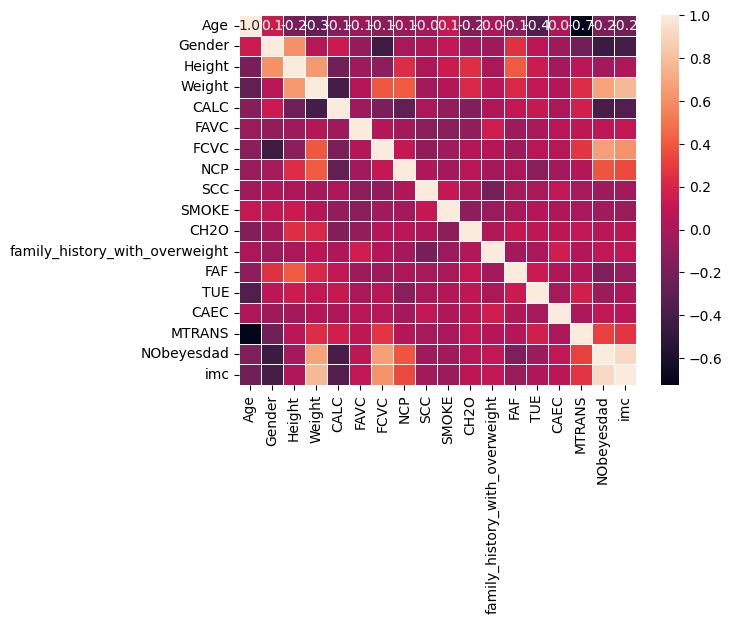

In [38]:
correlation = df_encoded.corr()


# plot da matriz de correlação

plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [ ]:
# Age & MTRANS (Qual transporte você costuma usar?) = -0.72 (correlação forte) 
    # O transporte usado tem uma forte relação com a idade do indivíduo.

# Weight & imc = 0.77 (correlação forte)
    # O imc do indivíduo tem uma forte relação com o seu peso.

# Height & Weight = 0.63 (correlação moderada)
    # A altura indivíduo tem uma relação moderada com o peso dele. 

# Weight & NObeyesdad (Nível de obesidad) = 0.67 (correlação moderada)
    # O peso do indivíduo tem uma relação moderada com o Nível de obesidade. 

# FCVC (Você costuma comer vegetais nas suas refeições) & NObeyesdad = 0.65 (correlação moderada)
    # O Nível de obesidade do indivíduo tem uma relação moderada com o ato de comer ou não vegetais em suas refeições. 

# FCVC & imc = 0.61 (correlação moderada)
    # O imc do indivíduo tem uma relação moderada com o ato de comer ou não vegetais em suas refeições.

In [39]:
pip install dash

  Using cached dash-2.17.1-py3-none-any.whl.metadata (10 kB)
  Using cached dash_html_components-2.0.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached dash_core_components-2.0.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached dash_table-5.0.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached retrying-1.3.4-py3-none-any.whl.metadata (6.9 kB)
Using cached dash-2.17.1-py3-none-any.whl (7.5 MB)
Using cached dash_core_components-2.0.0-py3-none-any.whl (3.8 kB)
Using cached dash_html_components-2.0.0-py3-none-any.whl (4.1 kB)
Using cached dash_table-5.0.0-py3-none-any.whl (3.9 kB)
Using cached retrying-1.3.4-py3-none-any.whl (11 kB)
Note: you may need to restart the kernel to use updated packages.


In [145]:
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px
import pandas as pd

# Supondo que df_encoded já está carregado e preparado
df = obesityTypeDataSet.copy()

# Certifique-se de que 'Age', 'MTRANS', 'Weight' e 'imc' estão no formato correto
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # Converte 'Age' para numérico, substituindo erros por NaN
df['MTRANS'] = df['MTRANS'].astype(str)  # Converte 'MTRANS' para string (se necessário)
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')  # Converte 'Weight' para numérico
df['Weight'] = df['Weight'].fillna(0).astype(int)  # Converte 'Weight' para inteiro, preenchendo NaN com 0
df['imc'] = pd.to_numeric(df['imc'], errors='coerce')  # Converte 'imc' para numérico

# Convertendo IMC para inteiro
df['imc'] = df['imc'].fillna(0).astype(int)

# Arredonda a coluna 'Height' para duas casas decimais
df_count_hw['Height'] = df_count_hw['Height'].round(2)


# Contagem de indivíduos por Age e MTRANS
df_count = df.groupby(['Age', 'MTRANS']).size().reset_index(name='count')


# Contagem de indivíduos por imc e nobeyesdad
df_count_imc_nob = df.groupby(['imc', 'NObeyesdad']).size().reset_index(name='count')

app = Dash(__name__)

app.layout = html.Div([
    html.H1(children='Dashbord - OBESITY LEVELS', style={'textAlign': 'center'}),
    html.Div([
        dcc.Graph(id='line-graph-age-mtrans'),
        dcc.Graph(id='scatter-graph-weight-imc')
    ], style={'display': 'flex', 'justify-content': 'space-around'}),
    html.Div([
        dcc.Graph(id='bar-graph-height-weight'),
        dcc.Graph(id='bar-graph-weight-nobeyesdad')
    ], style={'display': 'flex', 'justify-content': 'space-around'}),
    html.Div([
        dcc.Graph(id='line-graph-imc-nobeyesdad'),
    ], style={'display': 'flex', 'justify-content': 'space-around'})
])


# O transporte usado tem uma forte relação com a idade do indivíduo.
@callback(
    Output('line-graph-age-mtrans', 'figure'),
    Input('line-graph-age-mtrans', 'id')  # O callback precisa de um Input, mesmo que não seja utilizado
)
def update_line_graph_age_mtrans(value):
    fig = px.line(df_count, x='Age', y='count', color='MTRANS', 
                  title='Quantidade de Indivíduos por Idade e Modo de Transporte', 
                  labels={'Age': 'Idade', 'count': 'Quantidade de Indivíduos', 'MTRANS': 'Modo de Transporte'})
    return fig





# O imc do indivíduo tem uma forte relação com o seu peso.
@callback(
    Output('scatter-graph-weight-imc', 'figure'),
    Input('scatter-graph-weight-imc', 'id')  # O callback precisa de um Input, mesmo que não seja utilizado
)
def update_scatter_graph_weight_imc(value):
    fig = px.scatter(df, x='Weight', y='imc', title='Relação entre Peso e IMC',
                     labels={'Weight': 'Peso', 'imc': 'IMC'})
    return fig





# A altura indivíduo tem uma relação moderada com o peso dele.

# Ajustando o callback para o gráfico de linha
@app.callback(
    Output('bar-graph-height-weight', 'figure'),
    Input('bar-graph-height-weight', 'id')  # O callback precisa de um Input, mesmo que não seja utilizado
)
def update_bar_graph_height_weight(value):
    
    fig = px.bar(df, x='Weight', y='Height', title='Relação entre Altura e Peso',
                     labels={'Weight': 'Peso', 'Height': 'Altura'})
    return fig





# O peso do indivíduo tem uma relação moderada com o Nível de obesidade. 

# Ajustando o callback para o gráfico de linha
@app.callback(
    Output('bar-graph-weight-nobeyesdad', 'figure'),
    Input('bar-graph-weight-nobeyesdad', 'id')  # O callback precisa de um Input, mesmo que não seja utilizado
)
def update_bar_graph_weight_nobeyesdad(value):
    
    fig = px.bar(df, x='NObeyesdad', y='Weight', title='Relação entre Peso e o Nível de Obesidade',
                     labels={'Weight': 'Peso', 'NObeyesdad': 'Nível de Obesidade'})
    return fig





# O imc do indivíduo tem uma relação muito forte com o nível de obesidade.

# Ajustando o callback para o gráfico de linha
@app.callback(
    Output('line-graph-imc-nobeyesdad', 'figure'),
    Input('line-graph-imc-nobeyesdad', 'id')  # O callback precisa de um Input, mesmo que não seja utilizado
)
def update_line_graph_imc_nobeyesdad(value):
    fig = px.line(df_count_imc_nob, x='imc', y='count', color='NObeyesdad', 
                  title='Quantidade de Indivíduos por IMC e Nível de Obesidade',
                  labels={'count': 'Quantidade de Indivíduos', 'imc': 'IMC', 'NObeyesdad': 'Nível de Obesidade'})
    return fig




if __name__ == '__main__':
    app.run(debug=True)
